# A Quick Sage Tutorial on Graphs and Groups: Part 2

## 0. Intro

This part of the tutorial assumes an elementary understanding of group theory. If you want to follow along and be able to edit the code cells, you should [download](https://dodoturkoz.github.io/URSS/part2.ipynb) this notebook. Make sure that you've read the [previous part](https://dodoturkoz.github.io/URSS/part1.html) since we will apply some new concepts to the examples from the previous part.

## 1. Graph Isomorphisms and Automorphisms

Graphs $G$ and $H$ are said to be isomorphic if there exists a bijection $f:V(G) \to V(H)$   between their vertex sets and $u,v \in G$ are adjacent if and only if $f(u),f(v) \in H$ are adjacent. Informally, if we can relabel $G$ so that the edge relations are preserved, then $G \cong H$. Here is a simple example.

In [28]:
T = graphs.TetrahedralGraph()

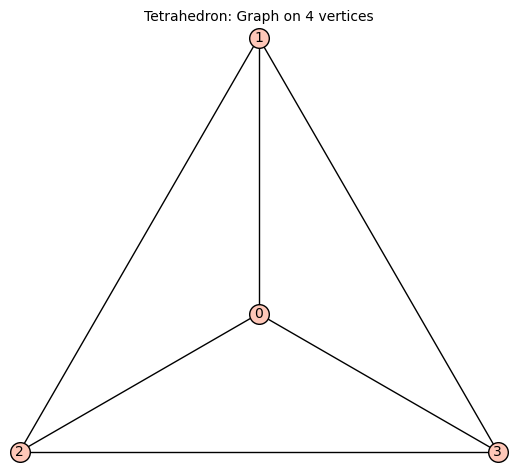

In [29]:
T

This seems very similar to one of the graphs we've seen before...

In [30]:
K4 = graphs.CompleteGraph(4)

In [31]:
T.is_isomorphic(K4)

True

A graph automorphism is an isomorphism from the graph to itself. It is easy to see that the automorphisms of a graph form a group under composition. We can use Sage to compute these groups; Sage will return them as permutation groups. As an example, we will identify the automorphism group of the Chvátal graph, whose structure might not be obvious at a first glance.

In [14]:
Ch = graphs.ChvatalGraph()

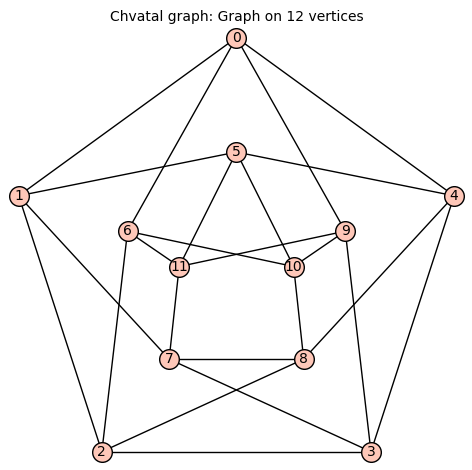

In [20]:
Ch

In [35]:
G = Ch.automorphism_group()

In [36]:
G

Permutation Group with generators [(1,4)(2,3)(6,9)(7,8)(10,11), (0,1)(2,6)(3,11)(4,5)(7,9)(8,10)]

Now, we could try to identify this group by computing it's properties via Sage, but there is a much nicer trick. We can access GAP functions using Sage (see [here](https://doc.sagemath.org/html/en/reference/interfaces/sage/interfaces/gap.html) for more). We can use the StructureDescription() function of GAP to identify this group. 

In [19]:
G.gap().StructureDescription()

"D8"

It turns out that the automorphism group of the Chvátal graph is the Dihedral group of order 8. 

**Exercise**: Find the automorphism groups of the graphs $K_n, P_n, C_n$ for all $n$.

**Exercise**: Find an graph $G$ such that $|Aut(G)|=1$, such graphs are called asymmetric graphs. Slightly harder is to find a graph $G$ such that $|Aut(G)|=3$.

A graph $G$ is called vertex-transitive if we can always find an automorphism of $G$ to map any vertex of $G$ to any other vertex of $G$. That is, $Aut(G)$ acts transitively on $V(G)$. 

In [32]:
K4.is_vertex_transitive()

True

**Exercise**: Convince yourself that $K_n$ is vertex-transitive for all $n$. Try to find more examples of vertex-transitive graphs.

**Exercise**: Sketch all vertex-transitive graphs of order $\leq 4$.

Let's now look at a rather famous graph, which is often a good starting point if you are looking for a counterexample.

In [23]:
Pet = graphs.PetersenGraph()

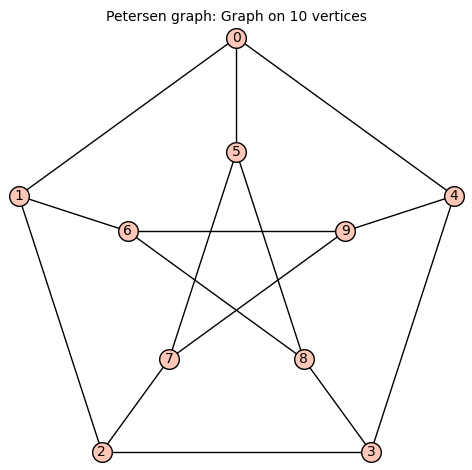

In [24]:
Pet

In [26]:
Pet.is_vertex_transitive()

True

**Exercise**: Prove that the Petersen graph is vertex-transitive.

**Exercise**: Convince yourself that all vertex-transitive graphs are regular. Is it true that all regular graphs are vertex-transitive?

Let's finish with a theorem which motivates the next section.

Frucht's theorem (1939) says that for any finite group $G$ there exist infinitely many non-isomorphic simple connected graphs such that the automorphism group of each of them is isomorphic to $G$. The proof (which we won't get into) uses Cayley graphs!

**Exercise**: Pick your favourite group $H$ (a small one may make things easier). Find a graph $G$ such that $Aut(G) \cong H$.

## 2. Cayley Graphs

In the last decade, a lot of research has been done on Cayley graphs of groups. The definition of a Cayley graph involves directed graphs; however, a set of some assumptions we will allow us to treat Cayley graphs as undirected simple graphs.

Let $H$ be a finite group and let $S \subseteq H$. The Cayley graph $G(H, S)$ has vertex set equal to $H$ and two vertices $g, h \in H$ are joined by a directed edge from $g$ to $h$ if and only if we can find $s \in S$ such that $g=s h$. We then label this edge $s \in S$.

It is common to take $S$ to be a symmetric set, i.e., $S=S^{-1}$, which allows us to view Cayley graphs as undirected graphs. It is also customary to ensure $1 \notin S$ to prevent loops. With these assumptions $G$ is an undirected simple graph.

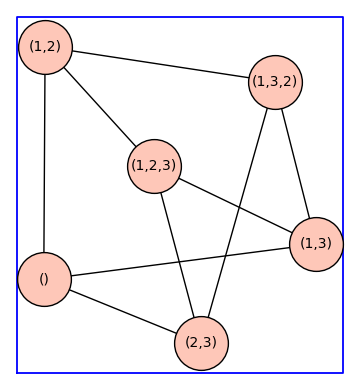

In [53]:
G=SymmetricGroup(3)
CG = G.cayley_graph(generators=[(1,2),(1,3),(2,3)])
CGU = CG.to_undirected()
CGU.show(vertex_size = 1500, figsize=(4, 4), graph_border=True)

**Exercise**: Convince yourself that $Q_n$ is a Cayley graph.

**Exercise**: Can two different groups have isomporphic Cayley graphs?

Let's now see an example where $S$ doesn't generate $H$, i.e. $H \neq \langle S \rangle$.

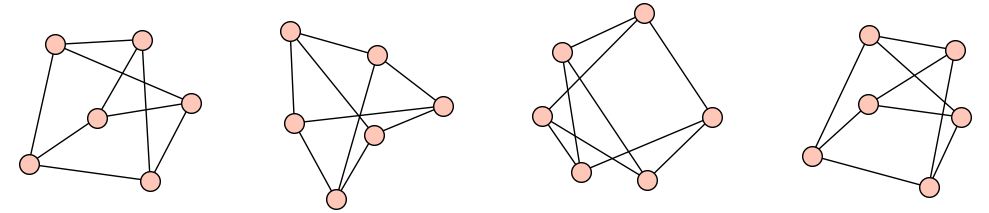

In [59]:
G=SymmetricGroup(4)
CG = G.cayley_graph(generators=[(1,2),(1,3),(2,3)])
CGU = CG.to_undirected()
CGU.show(vertex_labels = False, figsize = (10,10))

**Exercise**: Convince yourself that the Cayley graph $G(H,S)$ is connected if and only if $H = \langle S \rangle$.

**Exercise**: In the case where  $H \neq \langle S \rangle$, explain what the connected components of $G$ represent (Hint: Think about the subgroup generated by $S$).

Since the .cayley_graph() is related to a very specific area of mathematics, it might be hard to find examples of this function online. One potential solution (also mentioned in the introduction) is to run the following code cell, which outputs the relevant section of the documentation.

In [44]:
G.cayley_graph?

Let's try one of the examples from the documentation.

In [58]:
A5 = AlternatingGroup(5)
G = A5.cayley_graph()
G = G.to_undirected()
G.show3d(vertex_size=0.03, edge_size=0.01, edge_size2=0.02, vertex_colors={(1,1,1):G.vertices(sort=True)}, bgcolor=(0,0,0), color_by_label=True, xres=700, yres=700, iterations=200)

Graphics3d Object

**Exercise**: Given a graph $G$ can we always say that $G$ is a Cayley graph of some group? What if we assume that $G$ is vertex-transitive?

**Exercise**: Show that Cayley graphs are vertex-transitive. 